# Uber Pickups in New York City

We will have some exploratory data analysis on the Uber Pickups in New York City dataset.

#### The Data
The data contains on over 4.5 million Uber pickups in New York City from April to September 2014.

There are six files of raw data on Uber pickups in New York City from April to September 2014 names:

- uber-raw-data-apr14.csv
- uber-raw-data-aug14.csv
- uber-raw-data-jul14.csv
- uber-raw-data-jun14.csv
- uber-raw-data-may14.csv
- uber-raw-data-sep14.csv

The files are separated by month and each has the following columns:

- Date/Time : The date and time of the Uber pickup
- Lat : The latitude of the Uber pickup
- Lon : The longitude of the Uber pickup
- Base : The TLC base company code affiliated with the Uber pickup

The Base codes are for the following Uber bases:

- B02512 : Unter 
- B02598 : Hinter 
- B02617 : Weiter 
- B02682 : Schmecken 
- B02764 : Danach-NY 
- B02765 : Grun B02835 : 
- Dreist B02836 : Drinnen



In [1]:
# import libraries

# pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

import folium
from folium import plugins

### Load data
Let's concatenates all the 2014 Uber data and put it into a single dataframe.

In [2]:
#!dir "./data/uber-pickups-in-new-york-city"

In [3]:
apr_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
may_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
jun_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
jul_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
aug_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
sep_data = pd.read_csv("./data/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")


In [4]:
frames = [apr_data, may_data, jun_data, jul_data, aug_data, sep_data]
uber_2014  = pd.concat(frames)

In [5]:
uber_2014.shape

(4534327, 4)

In [6]:
uber_2014.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Check if there is any missing value

In [7]:
# Checking if there is any missing value
uber_2014.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

No missing value to handle.

### Downsize our sample
We have millions of records. Let's practice our methods on a downsized part of the data.

In [8]:
 data_2014 = uber_2014.sample(frac=0.01, replace=False, random_state=1);

In [9]:
data_2014.shape

(45343, 4)

### Add a column to compute some statistics
We'll add a column of ones called "n" to obtain easily some statistics.

In [10]:
# adding a column of ones to compute some statistics
data_2014['n'] = 1

In [11]:
data_2014.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'n'], dtype='object')

### Rename Date/Time column and convert it to in index

In [12]:
data_2014.rename(columns={'Date/Time':'DateTime'}, inplace=True)

In [13]:
data_2014.columns

Index(['DateTime', 'Lat', 'Lon', 'Base', 'n'], dtype='object')

In [14]:
data_2014.head()

,DateTime,Lat,Lon,Base,n
753909,8/26/2014 19:49:00,40.7270,-73.9767,B02682,1
601873,8/31/2014 14:40:00,40.7482,-73.9927,B02617,1
890927,9/10/2014 15:48:00,40.7557,-73.9895,B02764,1
433155,8/15/2014 20:47:00,40.7081,-74.0116,B02617,1
169714,9/17/2014 15:10:00,40.7417,-73.9894,B02598,1


We convert our colum to a datetime and turn it to an index to have some time series capabilities.

In [16]:
data_2014.DateTime.head(5)

753909    8/26/2014 19:49:00
601873    8/31/2014 14:40:00
890927    9/10/2014 15:48:00
433155    8/15/2014 20:47:00
169714    9/17/2014 15:10:00
Name: DateTime, dtype: object

In [15]:
data_2014.dtypes

DateTime     object
Lat         float64
Lon         float64
Base         object
n             int64
dtype: object

In [17]:
data_2014.DateTime = pd.to_datetime(data_2014.DateTime)


In [19]:
data_2014.dtypes

DateTime    datetime64[ns]
Lat                float64
Lon                float64
Base                object
n                    int64
dtype: object

In [20]:
data_2014.DateTime.head(5)

753909   2014-08-26 19:49:00
601873   2014-08-31 14:40:00
890927   2014-09-10 15:48:00
433155   2014-08-15 20:47:00
169714   2014-09-17 15:10:00
Name: DateTime, dtype: datetime64[ns]

In [18]:
data_2014.head(5)

,DateTime,Lat,Lon,Base,n
753909,2014-08-26 19:49:00,40.7270,-73.9767,B02682,1
601873,2014-08-31 14:40:00,40.7482,-73.9927,B02617,1
890927,2014-09-10 15:48:00,40.7557,-73.9895,B02764,1
433155,2014-08-15 20:47:00,40.7081,-74.0116,B02617,1
169714,2014-09-17 15:10:00,40.7417,-73.9894,B02598,1


In [21]:
# set DateTime as index
data_2014 = data_2014.set_index('DateTime')
data_2014.head(5)

,Lat,Lon,Base,n
DateTime,,,,
2014-08-26 19:49:00,40.7270,-73.9767,B02682,1
2014-08-31 14:40:00,40.7482,-73.9927,B02617,1
2014-09-10 15:48:00,40.7557,-73.9895,B02764,1
2014-08-15 20:47:00,40.7081,-74.0116,B02617,1
2014-09-17 15:10:00,40.7417,-73.9894,B02598,1


In [22]:
data_2014.columns

Index(['Lat', 'Lon', 'Base', 'n'], dtype='object')

In [24]:
data_2014.index.min()
data_2014.index.max()


Timestamp('2014-04-01 01:01:00')

Timestamp('2014-09-30 22:55:00')

In [25]:
data_2014['2014-04'].shape

(5712, 4)

In [26]:
data_2014.index.name

'DateTime'

In [27]:
data_2014.shape

(45343, 4)

### The Base feature


In [28]:
data_2014.Base.value_counts()

B02617    14574
B02598    14055
B02682    12066
B02764     2641
B02512     2007
Name: Base, dtype: int64

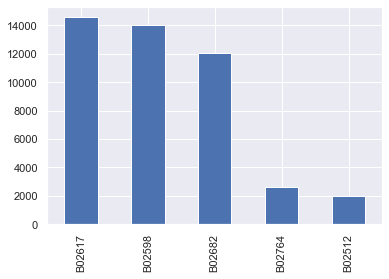

In [29]:
data_2014.Base.value_counts().plot(kind='bar');

We've got indeed five Bases, and three of them seems more important thant the two others.

### Plot the pickups

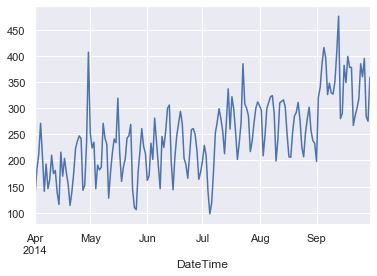

In [62]:
data_2014.n.resample('D').count().plot();

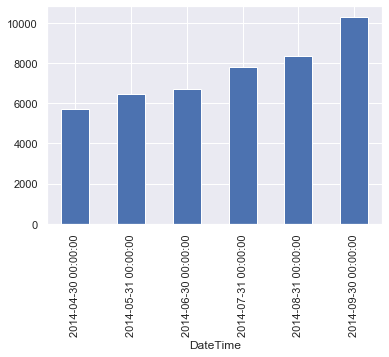

In [65]:
data_2014.n.resample('M').count().plot(kind='bar');

In [38]:
# Add columns with year, month, and weekday name
data_2014['Year'] = data_2014.index.year
data_2014['Month'] = data_2014.index.month
#data_2014['WeekdayName'] = data_2014.index.weekday_name
data_2014['WeekdayName'] = pd.Categorical(data_2014.index.weekday_name, categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
data_2014['Hour'] = data_2014.index.hour

In [39]:
data_2014.head(5)

,Lat,Lon,Base,n,Year,Month,WeekdayName,Hour
DateTime,,,,,,,,
2014-08-26 19:49:00,40.7270,-73.9767,B02682,1,2014,8,Tuesday,19
2014-08-31 14:40:00,40.7482,-73.9927,B02617,1,2014,8,Sunday,14
2014-09-10 15:48:00,40.7557,-73.9895,B02764,1,2014,9,Wednesday,15
2014-08-15 20:47:00,40.7081,-74.0116,B02617,1,2014,8,Friday,20
2014-09-17 15:10:00,40.7417,-73.9894,B02598,1,2014,9,Wednesday,15


In [40]:
data_2014.groupby('Month').count()

,Lat,Lon,Base,n,Year,WeekdayName,Hour
Month,,,,,,,
4,5712,5712,5712,5712,5712,5712,5712
5,6455,6455,6455,6455,6455,6455,6455
6,6689,6689,6689,6689,6689,6689,6689
7,7818,7818,7818,7818,7818,7818,7818
8,8364,8364,8364,8364,8364,8364,8364
9,10305,10305,10305,10305,10305,10305,10305


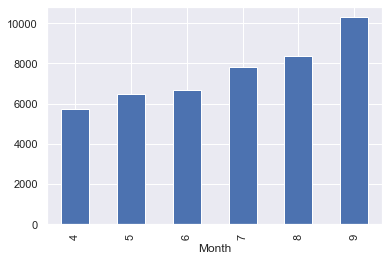

In [66]:
data_2014.groupby('Month').n.count().plot(kind='bar');

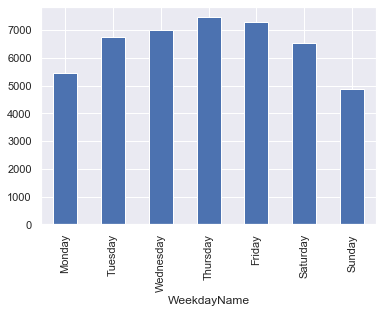

In [67]:
data_2014.groupby('WeekdayName').n.count().plot(kind='bar');

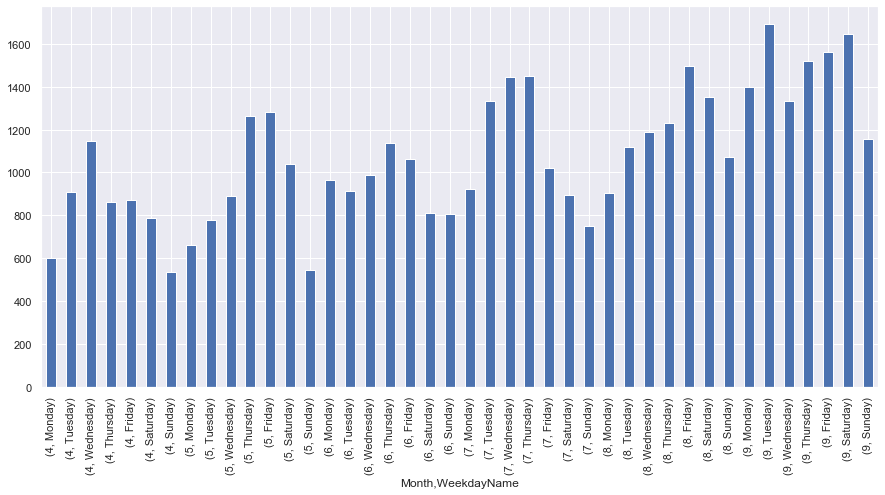

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
data_2014.groupby(['Month','WeekdayName']).n.count().plot(kind='bar')

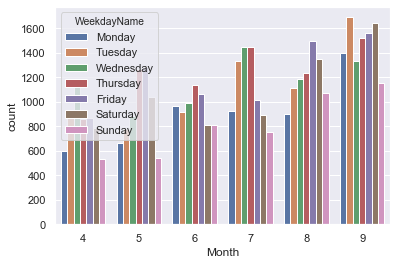

In [44]:
sns.countplot(data=data_2014,x='Month',hue='WeekdayName')

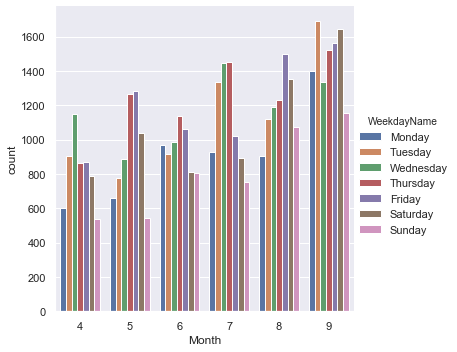

In [45]:
sns.catplot(data=data_2014,kind='count',x='Month',hue='WeekdayName')

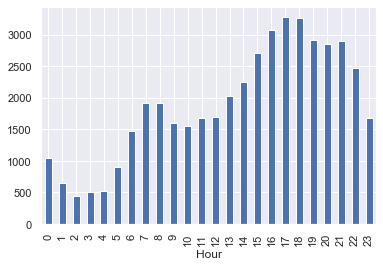

In [46]:
data_2014.groupby('Hour').n.count().plot(kind='bar')

Pickups seem more numerous during the day with a peack at the end of the day and a smaller one at the beginnin of the day.

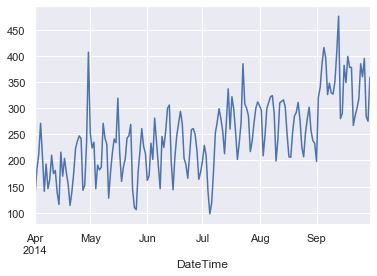

In [47]:
data_2014.n.resample('D').sum().plot()

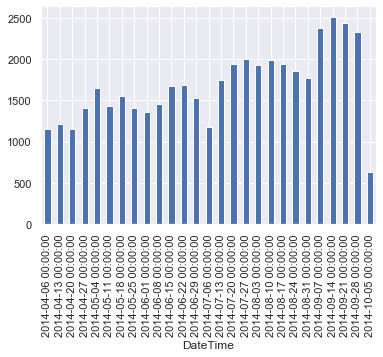

In [48]:
data_2014.n.resample('W').sum().plot(kind='bar')

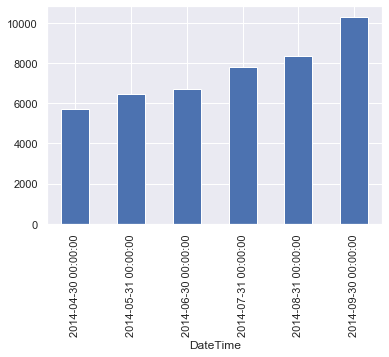

In [49]:
data_2014.n.resample('m').sum().plot(kind='bar')

In [50]:
data_2014.columns

Index(['Lat', 'Lon', 'Base', 'n', 'Year', 'Month', 'WeekdayName', 'Hour'], dtype='object')

In [51]:
m = folium.Map([data_2014.Lat.mean(), data_2014.Lon.mean()], zoom_start=11)

In [52]:
m

In [53]:
# convert to (n, 2) nd-array format for heatmap
uber_pickups = data_2014[['Lat', 'Lon']].to_numpy()

# plot heatmap
m.add_child(plugins.HeatMap(uber_pickups, radius=15));


In [54]:
m

In [55]:
data_2014.index

DatetimeIndex(['2014-08-26 19:49:00', '2014-08-31 14:40:00',
               '2014-09-10 15:48:00', '2014-08-15 20:47:00',
               '2014-09-17 15:10:00', '2014-07-02 05:49:00',
               '2014-08-22 16:31:00', '2014-09-16 16:25:00',
               '2014-07-22 16:50:00', '2014-09-27 21:46:00',
               ...
               '2014-08-27 16:37:00', '2014-08-24 05:49:00',
               '2014-08-06 23:03:00', '2014-09-14 23:55:00',
               '2014-08-04 06:44:00', '2014-08-08 16:57:00',
               '2014-05-21 16:39:00', '2014-09-28 10:22:00',
               '2014-05-12 06:44:00', '2014-06-08 08:15:00'],
              dtype='datetime64[ns]', name='DateTime', length=45343, freq=None)

In [56]:
sorted(data_2014.Month.unique())

[4, 5, 6, 7, 8, 9]

In [57]:
heat_data1 = []
for i in sorted(data_2014.Month.unique()):
    heat_data2 = []
    heat_data1.append(heat_data2)
    
    for index, row in data_2014[data_2014['Month'] == i].iterrows():
        lat_lon = [row['Lat'],row['Lon']]
        heat_data2.append(lat_lon)

In [58]:
heat_data1

[[[40.6485, -73.7843],
  [40.7787, -73.9562],
  [40.6718, -73.9635],
  [40.7237, -73.9965],
  [40.7722, -73.9603],
  [40.7686, -73.9168],
  [40.7443, -73.976],
  [40.7337, -74.0063],
  [40.7413, -73.9961],
  [40.7608, -73.9787],
  [40.7569, -73.9816],
  [40.7278, -73.9929],
  [40.7358, -74.0288],
  [40.7437, -73.9878],
  [40.7895, -73.9546],
  [40.7501, -73.9812],
  [40.7152, -74.0159],
  [40.7089, -74.0163],
  [40.7633, -73.9591],
  [40.6805, -73.984],
  [40.7343, -73.9804],
  [40.7556, -73.9823],
  [40.7451, -74.0024],
  [40.7053, -74.0174],
  [40.7522, -73.9914],
  [40.7486, -73.9761],
  [40.7445, -74.0063],
  [40.6701, -73.9829],
  [40.7426, -74.0005],
  [40.7462, -73.979],
  [40.7734, -73.9517],
  [40.7285, -74.1401],
  [40.742, -74.0018],
  [40.7607, -73.9991],
  [40.713, -73.9574],
  [40.7198, -73.9601],
  [40.7663, -73.9659],
  [40.7573, -73.9842],
  [40.7525, -73.9903],
  [40.7516, -73.9724],
  [40.7396, -74.028],
  [40.7338, -73.9901],
  [40.7439, -73.9878],
  [40.7294, -74.0

In [59]:
m2 = folium.Map([data_2014.Lat.mean(), data_2014.Lon.mean()], zoom_start=11)



#m2

hm = plugins.HeatMapWithTime(
    data=heat_data1,
    index=sorted(data_2014.Month.unique()),
    auto_play=True,
    max_opacity=0.3,
    radius=15
)

hm.add_to(m2)

m2

Data source:
- https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/data

Other ressources:
- https://data-flair.training/blogs/r-data-science-project-uber-data-analysis/
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html